# Import The Libraries

In [149]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rearrange the data creating our train and test arrays

In [150]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\marwa\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [151]:
#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images=train_images1[:10000,:]
# train_labels=train_labels1[:10000]
# test_images=test_images1[:1000,:]
# test_labels=test_labels1[:1000]

In [152]:
#checking the arrays
train_images.shape , type(train_images) , test_images.shape , type(test_images)

((60000, 28, 28), numpy.ndarray, (10000, 28, 28), numpy.ndarray)

# Plotting numbers

In [153]:
#function to plot the number
def plot_img(mnist_index):
    image = mnist_index
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

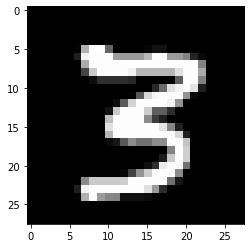

3

In [154]:
#test the function
plot_img(train_images[7878])
train_labels[7878]

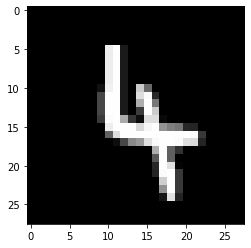

4

In [155]:
#test function
plot_img(test_images[432])
test_labels[432]

# ReShaping image to small images

In [156]:
# this function return same input but divided in nGrid Images each image with dimensions row * col (return image as bloks)
def imaged_grid(img , row , col ):

    x , y = img.shape
    #check if the row and col is divisble by img shape
    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)
    
    return (img.reshape( x//row, row, -1, col).swapaxes(1,2).reshape(-1, row, col))

In [177]:
#test function
print(imaged_grid(test_images[432] , 7 , 14 ).shape)
imaged_grid(test_images[432] , 7 , 14 )

(8, 7, 14)


array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 238, 255,
          26,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 237, 254,
          26,   0]],

       [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0, 

# Feature extraction by the centroid

In [158]:
# return feature vector for current image 
def get_centroid(img):
    feature_vector = []
    #for loop on the grids
    for grid in imaged_grid(img , 7 , 14 ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
        #for loop in each grid
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
          feature_vector.append( Xc/ sum )
          feature_vector.append(Yc/ sum )
        else :
          #grid is empty
          feature_vector.append(0)
          feature_vector.append(0)
    
    return np.array(feature_vector)

In [159]:
#test function
get_centroid(test_images[432])

array([ 5.49903475, 10.59169884,  0.        ,  0.        ,  3.13381184,
       10.49089977,  4.67695583,  0.84353379,  1.16878531, 11.51129944,
        2.60353535,  3.19023569,  0.        ,  0.        ,  1.23114224,
        3.73329741])

# Creating test and train features 

In [160]:
#create train feature
train_features = [get_centroid(img)  for img in train_images  ]

In [161]:
train_features = np.array(train_features)

In [162]:
train_features.shape
train_features[:2]

array([[ 5.97229551, 11.6055409 ,  5.62568701,  4.63812554,  1.92178018,
        11.10367498,  1.53328895,  1.93608522,  5.23522727, 12.36363636,
         3.24870541,  2.6051496 ,  1.60348032,  8.98800473,  0.14285714,
         0.60192616],
       [ 6.        , 13.        ,  5.24409222,  2.81123919,  3.27941463,
        10.83317073,  2.25928864,  4.4609282 ,  3.20426365,  7.8209702 ,
         3.18791541,  4.52990937,  0.84754241,  9.92931709,  0.20055325,
         0.63070539]])

In [163]:
#create test feature
test_features = [get_centroid(img)  for img in test_images  ]

In [164]:
test_features = np.array(test_features)

In [165]:
test_features.shape
test_features[:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.19443729,
         9.54365182,  2.83908621,  3.84675671,  5.91555556, 12.98666667,
         2.97017501,  2.05669214,  2.86841394, 11.92785734,  0.90693739,
         0.1319797 ],
       [ 4.56700508, 10.56903553,  4.56971064,  1.26719278,  3.72274798,
        11.43778479,  1.95129284,  0.9305472 ,  3.31512801, 10.18355314,
         5.79673221,  6.54721684,  0.31214149, 10.79636711,  0.30622132,
         4.13895971]])

# Classification algorithms "KNN" 

In [178]:
# function return predicted lablels to be compared with the test label
def KNN(train_features, test_features, train_labels):
    knn = KNeighborsClassifier(4)
    knn.fit(train_features, train_labels)  # fit train data
    prediction = knn.predict(test_features)  # test data
    return prediction

In [179]:
Knn_prediction = KNN(train_features, test_features , train_labels )

In [180]:
print("Accuracy Score =", accuracy_score(test_labels, Knn_prediction) * 100, "%")

Accuracy Score = 92.91 %
